In [86]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt

In [87]:
nairobi=pd.read_csv("nairobi_preds.csv")
siaya=pd.read_csv('siaya_preds.csv')
machakos=pd.read_csv("machakos_preds.csv")
homabay=pd.read_csv("homabay_preds.csv")

In [88]:
#Add County Column to the data Frames
nairobi['County']='Nairobi'
siaya['County']='Siaya'
machakos['County']='Machakos'
homabay['County']='Homabay'

In [89]:
#Rowbind the datasets
combi = pd.concat([nairobi, siaya,machakos,homabay], axis=0)
combi.groupby('County').count()

,Unnamed: 0,Positive,Negative,FinalTestResult,PC1,PC2,PC3,PC4,PC5,PC6,...,EverTestedForHIV,MonthsSinceLastTest,ClientTestedAs,EntryPoint,TestingStrategy,TBScreening,ClientSelfTested,month_of_test,dayofweek,Sitecode
County,,,,,,,,,,,,,,,,,,,,,
Homabay,7013,7013,7013,7013,7013,7013,7013,7013,7013,7013,...,7013,7013,7013,0,7013,7013,7013,7013,7013,7013
Machakos,14636,14636,14636,14636,14636,14636,14636,14636,14636,14636,...,14636,14636,14636,14636,14636,14636,14636,14636,14636,14636
Nairobi,44456,44456,44456,44456,44456,44456,44456,44456,44456,44456,...,44456,44456,44456,44456,44456,44456,44456,44456,44456,44456
Siaya,45687,45687,45687,45687,45687,45687,45687,45687,45687,45687,...,45687,45687,45687,45687,45687,45687,45687,45687,45687,45687


In [90]:
#Create a function to create the Risk Outcome & Age Group Columns
def set_outcome_age(data,highestrisk,highrisk,mediumrisk,county):
    #Create Risk Outcome 
    data.loc[(data['Positive'] >= highestrisk) & (data['County']==county), 'RiskOutcome'] = 'Highest Risk'
    data.loc[(data['Positive'] >= highrisk)&(data['Positive'] < highestrisk) & (data['County']==county), 'RiskOutcome'] = 'High Risk'
    data.loc[(data['Positive'] >= mediumrisk) & (data['Positive'] <highrisk) & (data['County']==county), 'RiskOutcome'] = 'Medium Risk'
    data.loc[(data['Positive'] < mediumrisk) & (data['County']==county), 'RiskOutcome'] = 'Low Risk'
  #Create Age Group  
    data.loc[(data['AgeAtTest'] >= 15), 'AgeGroup'] = 'Over 15 Yrs'
    data.loc[(data['AgeAtTest'] <15), 'AgeGroup'] = 'Under 15 Yrs'

  #Create HHRiskOutcome Column
    data.loc[(data['RiskOutcome']=='Highest Risk') |(data['RiskOutcome']=='High Risk') , 'HHRiskOutcome'] = 'High Risk'
    data.loc[(data['RiskOutcome']=='Medium Risk'), 'HHRiskOutcome'] = 'Medium Risk'
    data.loc[(data['RiskOutcome']=='Low Risk'), 'HHRiskOutcome'] = 'Low Risk'

  #Create HHMRiskOutcome Column
    data.loc[(data['RiskOutcome']=='Highest Risk') | (data['RiskOutcome']=='High Risk') |(data['RiskOutcome']=='Medium Risk'), 'HHMRiskOutcome'] = 'High Risk'
    data.loc[(data['RiskOutcome']=='Low Risk'), 'HHMRiskOutcome'] = 'Low Risk'
    #Create HHMRiskOutcome Column
    data.loc[(data['RiskOutcome']=='Highest Risk') | (data['RiskOutcome']=='High Risk') |(data['RiskOutcome']=='Medium Risk')|(data['RiskOutcome']=='High Risk')
             , 'HHMLRiskOutcome'] = 'All Risk'

# Create the Category Types as Factors
    outcome_types = ['Highest Risk', 'High Risk', 'Medium Risk', 'Low Risk']
    cat_type = CategoricalDtype(categories=outcome_types, ordered=True)
    data['RiskOutcome'] =data['RiskOutcome'].astype(cat_type)   
    data['HHRiskOutcome'] =data['HHRiskOutcome'].astype(cat_type) 
    data['HHMRiskOutcome'] =data['HHMRiskOutcome'].astype(cat_type) 

In [91]:
# Call the function that will compute the Risk Outcome for the counties and Order them from Highest to Low
set_outcome_age(combi,0.372,0.25,0.094,'Machakos')
set_outcome_age(combi,0.562,0.275,0.088,'Nairobi')
set_outcome_age(combi,0.508,0.26,0.076,'Siaya')
set_outcome_age(combi,0.362,0.188,0.05,'Homabay')

In [92]:
#Summary of the Outcomes by County
RiskbyCounty=combi[['County','RiskOutcome','Unnamed: 0']].groupby(['County','RiskOutcome']).count()
RiskbyCounty=pd.pivot_table(RiskbyCounty, values='Unnamed: 0', 
                    columns='County',
                    index=['RiskOutcome'])
RiskbyCounty

County,Homabay,Machakos,Nairobi,Siaya
RiskOutcome,,,,
Highest Risk,100,79,157,741
High Risk,156,107,603,1308
Medium Risk,578,522,2335,4353
Low Risk,6179,13928,41361,39285


In [93]:
#Summary of the Combined Highest and High Risk Outcomes by County
HHRiskbyCounty=combi[['County','HHRiskOutcome','Unnamed: 0']].groupby(['County','HHRiskOutcome']).count()
HHRiskbyCounty=pd.pivot_table(HHRiskbyCounty, values='Unnamed: 0', 
                    columns='County',
                    index=['HHRiskOutcome'])
HHRiskbyCounty

County,Homabay,Machakos,Nairobi,Siaya
HHRiskOutcome,,,,
High Risk,256.0,186.0,760.0,2049.0
Medium Risk,578.0,522.0,2335.0,4353.0
Low Risk,6179.0,13928.0,41361.0,39285.0


In [16]:
#Summary of the Combined Highest, High and Medium Risk Outcomes by County
HHMRiskbyCounty=combi[['County','HHMRiskOutcome','Unnamed: 0']].groupby(['County','HHMRiskOutcome']).count()
HHMRiskbyCounty=pd.pivot_table(HHMRiskbyCounty, values='Unnamed: 0', 
                    columns='County',
                    index=['HHMRiskOutcome'])
HHMRiskbyCounty

County,Homabay,Machakos,Nairobi,Siaya
HHMRiskOutcome,,,,
High Risk,834.0,708.0,3095.0,6402.0
Low Risk,6179.0,13928.0,41361.0,39285.0


In [94]:
#COMPUTE POSITIVITY FOR THE COUNTIES
CountyPosit=combi[['County','FinalTestResult','Unnamed: 0']].groupby(['County','FinalTestResult']).count()
CountyPosit=pd.pivot_table(CountyPosit, values='Unnamed: 0', 
                    columns='FinalTestResult',
                    index=['County'])
CountyPosit['TotalTested']=CountyPosit['Negative']+CountyPosit['Positive']
CountyPosit['Positivity']=round((CountyPosit['Positive']/CountyPosit['TotalTested'])*100,1)
CountyPosit=CountyPosit.sort_values('Positivity',ascending=False)
CountyPosit

FinalTestResult,Negative,Positive,TotalTested,Positivity
County,,,,
Siaya,43338,2349,45687,5.1
Homabay,6697,316,7013,4.5
Nairobi,42959,1497,44456,3.4
Machakos,14173,463,14636,3.2


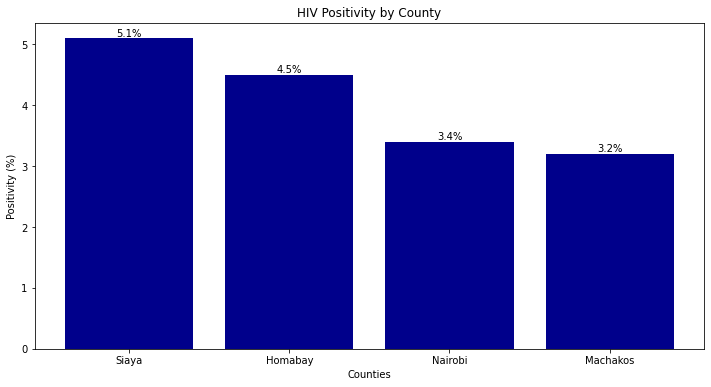

In [95]:
#Bar Chart for Positivity by County
county = CountyPosit.index
positivity = CountyPosit.Positivity
plt.figure(figsize=(12,6))
plt.title("HIV Positivity by County")
plt.ylabel("Positivity (%)")
plt.xlabel("Counties")
plt.bar(CountyPosit.index,'Positivity', color='darkblue',data=CountyPosit.sort_values('Positivity',ascending=False))
for i in range(len(positivity)):
    plt.annotate(str(positivity[i])+'%', xy=(county[i],positivity[i]), ha='center', va='bottom')
plt.show()

In [209]:
#COMPUTE POSITIVITY FOR THE COUNTIES and Different Outcomes - Create  a Function
def set_risk_summary(data,outcome,outcometype):
    RP=data[['County',outcome,'FinalTestResult','Unnamed: 0']].groupby([outcome,'County','FinalTestResult']).count().reset_index()
    RP['RiskType']=outcometype
    RP=pd.pivot_table(RP,values='Unnamed: 0', 
                    columns='FinalTestResult',
                    index=['County',outcome,'RiskType'])
    RP['TotalTested']=RP['Negative']+RP['Positive']
    RP['Positivity']=round((RP['Positive']/RP['TotalTested'])*100,1)
    RP=RP.sort_values('Positivity',ascending=False)
    
    return RP

In [235]:
#Compute positivity for the different Combined Outcoe
combiRisks = pd.concat([set_risk_summary(combi,'HHMLRiskOutcome','All Risks'),
                        set_risk_summary(combi,'RiskOutcome','Highest Risk'), 
                        set_risk_summary(combi,'HHRiskOutcome','HighestHighRisk'),
                        set_risk_summary(combi,'HHMRiskOutcome','HighestHighMediumRisk')
                       ], axis=0)
combiRisks.shape

(40, 4)

In [262]:
combiRisks=combiRisks.rename_axis(['County', 'RiskOutcome', 'RiskType'])
combiRisks.head(1)

,,FinalTestResult,Negative,Positive,TotalTested,Positivity
County,RiskOutcome,RiskType,,,,
Siaya,All Risk,All Risks,4810.0,1592.0,6402.0,24.9


In [263]:
#Get the Different Combined outcomes we need. All Risks, Highest Risk, High (from highest and high), High (from Highest,High and Medium Combined)
combiHighRisks= combiRisks.loc[(combiRisks.index.get_level_values('RiskOutcome')=='Highest Risk')& (combiRisks.index.get_level_values('RiskType')=='Highest Risk') |
         (combiRisks.index.get_level_values('RiskOutcome')=='High Risk')&(combiRisks.index.get_level_values('RiskType')=='HighestHighRisk') |
         (combiRisks.index.get_level_values('RiskOutcome')=='High Risk')&(combiRisks.index.get_level_values('RiskType')=='HighestHighMediumRisk') |
         (combiRisks.index.get_level_values('RiskOutcome')=='All Risk')&(combiRisks.index.get_level_values('RiskType')=='All Risks')]
combiRisks.head(1)

,,FinalTestResult,Negative,Positive,TotalTested,Positivity
County,RiskOutcome,RiskType,,,,
Siaya,All Risk,All Risks,4810.0,1592.0,6402.0,24.9


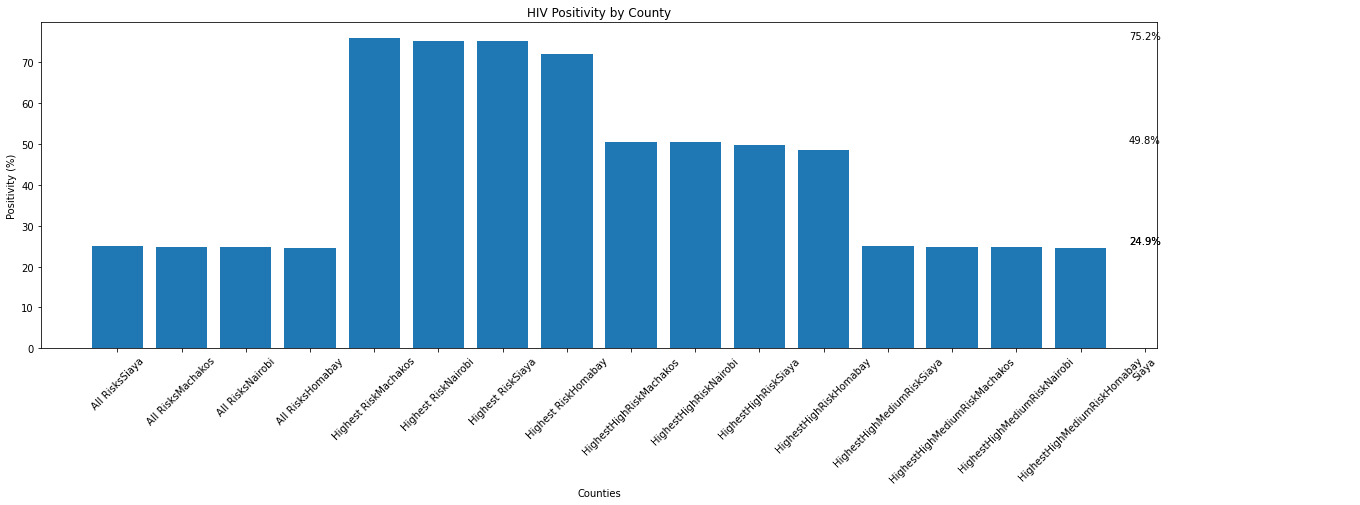

In [264]:
#Bar Chart for Positivity by County
county = combiHighRisks.index.get_level_values('County')
risktype = combiHighRisks.index.get_level_values('RiskType')
positivity = combiHighRisks.Positivity
plt.figure(figsize=(20,6))
plt.title("HIV Positivity by County")
plt.ylabel("Positivity (%)")
plt.xlabel("Counties")
plt.xticks(rotation=45)
# Plotting
plt.bar(risktype + county, positivity, label='Orange bar label')
for i in range(len(positivity)):
    plt.annotate(str(positivity[i])+'%', xy=(county[i],positivity[i]), ha='center', va='bottom')
plt.show()

In [260]:
combiHighRisks.groupby(['RiskType', 'County','Positivity']).unstack().plot(kind='bar')

AttributeError: 'DataFrameGroupBy' object has no attribute 'unstack'

NotImplementedError: Index._join_level on non-unique index is not implemented